# Prevendo vendas com Arima
+ *Método estatístico* para Previsão de *séries temporais* utilizando autoregressão e médias móveis.
+ O ARIMA depende de uma boa autocorrelação

In [1]:
import pandas as pd
champagne = pd.read_csv('champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [2]:
# Elinar warnings das bigliotecas
import warnings
warnings.filterwarnings("ignore")

In [3]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

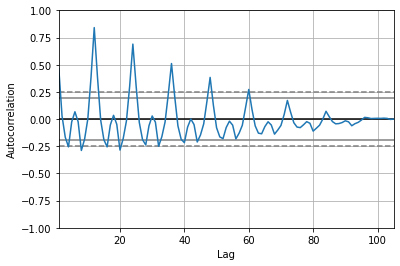

In [4]:
# autocorrelation plot - Plota autocorrelação entre os dados da série "champagne"
autocorrelation_plot(champagne)
plt.show()

+ O gráfico acima mostra que os dados mais recentes são melhor correlacionados

In [6]:
# outra forma de plotar a autocorrelação
# pip install statsmodels
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf # plot de autocorrelação
from statsmodels.graphics.tsaplots import plot_pacf # parcial correlation plot

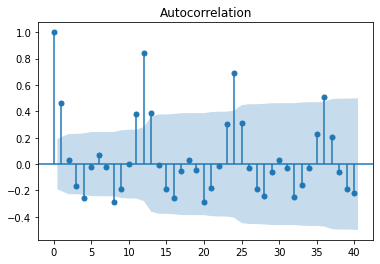

In [7]:
plot_acf(champagne, lags=40) # lags = quantidade de lags anteriores que irei ver.
plt.show()
# parte azul do gráfico mostra os níveis de significancia da correlação

+ até o nível 7 aproximadamente, temos lags bem autocorrelacionados no gráfico acima

In [8]:
# fit model
from statsmodels.tsa.arima_model import ARIMA

In [10]:
# Configurando o método arima
# ARIMA(p,d,q)
model = ARIMA(champagne, order=(7,1,1))

/home/hildebrando/projetos Ciência de dados/ETL/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/hildebrando/projetos Ciência de dados/ETL/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [11]:
# rodando o modelo
model_fit = model.fit()

In [13]:
# resumo
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:      D.Champagne sales   No. Observations:                  104
Model:                 ARIMA(7, 1, 1)   Log Likelihood                -938.828
Method:                       css-mle   S.D. of innovations           1954.371
Date:                Tue, 29 Jun 2021   AIC                           1897.655
Time:                        20:15:08   BIC                           1924.099
Sample:                    02-01-1964   HQIC                          1908.369
                         - 09-01-1972                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      23.8413      5.224      4.564      0.000      13.603      34.079
ar.L1.D.Champagne sales     0.4881      0.096      5.096      0.000       0.300       0.676


In [14]:
# Verificando os residuais - Erros entre o valor real e o valor predito
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)

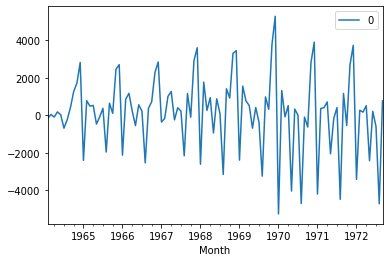

In [15]:
residuals.plot()
plt.show()